In [21]:
import pandas as pd
import pickle
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
with open(f'dataframes/{5   }.df', "rb") as f:
    df = pickle.load(f)

df.head()

,Rx,Tx,MPP Start Time (s),MPP Stop Time (s),Voltages (mV),Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,1.757522e+09,1.757522e+09,"[112.88, 117.46, 117.69, 117.46, 117.46, 117.8...",915,1,5
1,Tag2,Tag1,1.757522e+09,1.757522e+09,"[93.42, 100.82, 100.98, 100.98, 101.51, 100.9,...",915,1,5


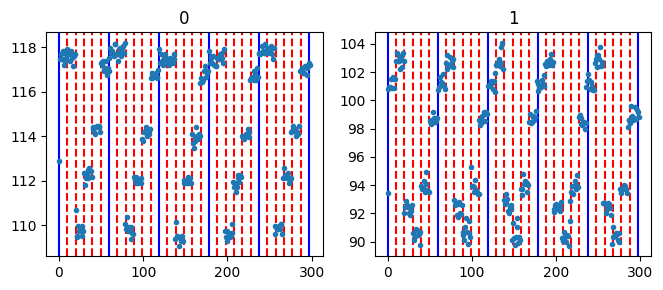

In [23]:

time_per_phase = 10/1000  # s
num_phases=6
num_mpps=df.iloc[0]['NumMPPs']
sampling_rate=1000
plotting=True
ver_lines = [0] + [ (time_per_phase-time_per_phase*0.01) * sampling_rate * (i + 1) for i in range(num_phases*num_mpps)]

processedDF=pd.DataFrame(columns=["Rx","Tx", "Voltages (mV)", "Phase1","Phase2","Phase3","Phase4","Phase5","Phase6",
                                "Frequency (MHz)", "Run Exp Num", "NumMPPs"])
plt.figure(figsize=(10,3))
for df_idx in range(len(df)):

    voltages=df.iloc[df_idx]['Voltages (mV)']
    phase_medians={
        1:[],
        2:[],
        3:[],
        4:[],
        5:[],
        6:[],
    }
    for idx,v in enumerate(ver_lines):
        if idx<len(ver_lines)-1:
            phase_medians[int(idx%num_phases)+1].append(np.median(voltages[int(ver_lines[idx]):int(ver_lines[idx+1])]))   
        if plotting:
            plt.subplot(len(df)//3+1, 3, df_idx+1)
            if idx%num_phases==0:
                plt.axvline(x=v, color='b', linestyle='-')
            else:
                plt.axvline(x=v, color='r', linestyle='--')
    entry={
        "Rx": df.iloc[df_idx]["Rx"],
        "Tx":df.iloc[df_idx]["Tx"],
        "Voltages (mV)":df.iloc[df_idx]["Voltages (mV)"],
        "Phase1":phase_medians[1],
        "Phase2":phase_medians[2],
        "Phase3":phase_medians[3],
        "Phase4":phase_medians[4],
        "Phase5":phase_medians[5],
        "Phase6":phase_medians[6],
        "Frequency (MHz)":df.iloc[df_idx]["Frequency (MHz)"],
        "Run Exp Num":df.iloc[df_idx]["Run Exp Num"],
        "NumMPPs":df.iloc[df_idx]["NumMPPs"],
    }
    
    # Identify and print bad MPPs
    bad=False
    for k in phase_medians.keys():
        assert(len(phase_medians[k])==num_mpps)
        if np.std(phase_medians[k])>1:
            print(f"Bad data found at {df_idx} df_idx at phase {k}.")
            print(len(phase_medians[k]), np.mean(phase_medians[k]), np.std(phase_medians[k]))
    
    processedDF=pd.concat([processedDF,pd.DataFrame([entry])],ignore_index=True)
    if plotting:
        plt.plot(voltages,'.')
        plt.title(df_idx)
        plt.tight_layout()
        
if plotting:
    plt.show()
    
    

In [24]:
processedDF

,Rx,Tx,Voltages (mV),Phase1,Phase2,Phase3,Phase4,Phase5,Phase6,Frequency (MHz),Run Exp Num,NumMPPs
0,Tag1,Tag2,"[112.88, 117.46, 117.69, 117.46, 117.46, 117.8...","[117.46, 117.725, 117.455, 117.3, 117.76]","[117.61, 117.875, 117.41999999999999, 117.495,...","[109.78999999999999, 109.78999999999999, 109.4...","[112.265, 112.0, 111.925, 111.96, 112.22999999...","[114.4, 114.1, 113.985, 113.985, 114.25]","[117.07, 116.72999999999999, 116.77, 116.69, 1...",915,1,5
1,Tag2,Tag1,"[93.42, 100.82, 100.98, 100.98, 101.51, 100.9,...","[100.98, 101.09, 101.05, 101.09, 101.164999999...","[102.81, 102.58, 102.58, 102.695, 102.845]","[92.39500000000001, 92.58, 92.62, 92.43, 92.47]","[90.485, 90.64, 90.25999999999999, 90.295, 90....","[93.765, 93.88, 94.07, 93.91999999999999, 93.765]","[98.54, 98.575, 98.84, 98.46, 98.725]",915,1,5


Bad pipe message: %s [b'zilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:141.0) Gecko/20100101 Firefox', b'41.0\r\nAccept: text/plain, */*; q=0.01\r\nAccept-', b'nguage: en-US,en;q=0.5\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nOrigin: h', b'ps://api-4c3c7a60.duosecurity.com\r\nDNT: 1\r\nConnection: keep-alive\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec']
Bad pipe message: %s [b'zilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:141.0) Gecko/20100101 Firefox', b'41.0\r\nAccept: text/plain, */*; q=0.01\r\nAccept-', b'nguage: en-US,en;q=0.5\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nOrigin: h', b'ps://api-4c3c7a60.duosecurity.com\r\nDNT: 1\r\nConnection: keep-alive\r\nSec-Fetch-Dest: empty\r\nSec-Fetch-Mode: cors\r\nSec']
